## **the parabolic mirror**
#### the parabolic mirror has a focal length of $f= $ 3mm. the general form of a parabola is $f(x)=\frac{x^2}{4 f}$, which means its equation is given by $y(x)=\frac{x^2}{12}$. its width is 69.282 mm, and its height is 100 mm. 

## **the OAP (off axis parabolic mirror)**
#### we're given the parent focal length (38.1 mm) and the radius of curvature (76.2 mm). we must determine which section of the parabola this corresponds to. the offset angle is $90 \deg$.

#### examining the dimensions, (height and width are both 76.2 mm),  the points of intersection are at $x=76.2-38.1=38.1$ mm and $x=76.2+38.1=114.3$ mm.


## **establish what's needed to plot reflected rays.** 
#### let $\vec{h}$ be the incident ray coming from the ion, and $\hat{n}$ is the unit normal vector to the point of tangency. the reflected ray $\vec{r}$ is given by:
### $\vec{r}=\vec{h}-2\ (\vec{h} \cdot \hat{n})\hat{n} $

## **find the normal vector.** 

#### the equation of the line tangent to the point $(x_0, f(x_0))$, or $(x_0, y_0)$, where the ray hits the mirror has slope $m_t=f'(x_0)$. its form is $y_{tan}(x)=m\cdot (x-x_0)+y_0$. the slope of normal vector is $m_n=$ -1/(slope of tangent vector), the negative reciprocal. the equation of the normal line is then $y_{n}(x)=-\frac{1}{m_t}\cdot (x-x_0)+y_0$. in our case, $dy/dx=x/6$. then at point $x_0$, $m_n=-dx/dy=-6/x_0$. so $\vec{n}=(-x_0, 6).$

## **find the vector of incident ray, ($\vec{h}$)**.
#### we can determine the vector for the incident ray by calculating the slope of that line. the slope is given by $m_{line}=dy/dx=(\text{y-coord of ion}-\text{y-coord of tangent point})/(\text{x-coord of ion}-\text{x-coord of tangent point})$. the vector is $(dx, dy).$

## **parameterize the reflected ray.** 

#### to plot the reflected ray, take the result from $\vec{r}=(r_x, r_y)$, we have the x and y components.  from this we can write a parametric equation for the reflected ray. the general form for a parametric equation is $p(t)=a+tb$, where $a$ is a point on the curve and $b$ is the direction vector, and $t$ is a variable. so given $r_x$ and $r_y$ from above, we can write parametric equations for the reflected ray. here $(x_0, f(x_0))$ is the tangent point on the parabola.

## **determine points  of intersection between reflected rays and the OAP.**

#### we use scipy's fsolve (which finds the roots of a function) to find the points of intersection between the rays that are reflected off the parabola and onto the OAP.

## **reflect the rays off the oap.**

#### using the process detailed above, we will again find the normal vector to determine $\vec{r}$. 

#### the expanded expression of the OAP is $\frac{-x^2+2hx-h^2}{2\cdot 76.2} +v $. its derivative is $ \frac{h-x}{76.2}$, and $-dx/dy=76.2/(x-h)$. then, $\vec{n}=(x_0-h, 76.2)$. let $(x_1, f(x_1))$ be the coordinate of where the reflected ray hits the OAP. we parameterize the rays reflected off the OAP again:
#### $x=x_1+r_x\cdot (\text{length})$ and
#### $y=f(x_1)+r_y\cdot(\text{length})$

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve


#function of parabola with focal length of 3mm
def parabola(x):
        return x**2/12
    
#define horizontal and vertical controls for OAP in mm
h, v = -76.2, 450

#function of the OAP
def oap(x): 
    return -(x-h)**2/(2*76.2)+v 

#define focal length for parabolic mirror:
xfocus, yfocus = 0,3

#coordinate for focus for OAP
xfocus2, yfocus2 = h, v-38.1 

#define parameters for parabolic mirror: width in mm
width = 69.282  #mm


def plot(number_of_rays, x_offset, y_offset, xmin, xmax, ymin, ymax):
    #control desired number of rays 

    
    #ion position and offset from focal length of 3mm or (0,3)
    ion_x, ion_y =xfocus+ x_offset, yfocus + y_offset

    #define ray space 
    x_rays = np.linspace(-width/2, width/2, number_of_rays) 
    
    # --- OAP coefficients general form: y = ax^2 + bx + c ---
    a, b, c = -np.longdouble(1/(2*76.2)), np.longdouble(1/76.2)*h, -np.longdouble(1/(2*76.2))*h**2 + v 
    
    #plot the parabola
    x_parabola = np.linspace(-width/2, width/2, 100)
    y_parabola = parabola(x_parabola)
    plt.figure(figsize=(8, 6))
    plt.plot(x_parabola, y_parabola, label='Parabola ', color='blue')
    
    #plot the OAP
    x_oap = np.linspace(38.1+h,114.3+h,400) 
    y_oap = np.longdouble(oap(x_oap))
    plt.plot(x_oap, y_oap, label="OAP", color='blue')


    #generate a bunch of rays originating from ion position 
    for xx in x_rays:
        #rays originate from (ion_x, ion_y) 
        xi = xx
        yi = parabola(xi)
        x_incident=[ion_x, xi] 
        y_incident=[ion_y, yi] 
    
        #plot incident rays
        plt.plot(x_incident, y_incident, 'r')
    
        #find the normal at points of intersection
        normal = np.array([-xi, 6]) # normal vector for the parabolic mirror 
        normal = normal / np.linalg.norm(normal) #normalize the vector 
    
        #define the vector of incident rays 
        incident = np.array([xi-ion_x, yi-ion_y])
    
        #reflect the rays using R = I - 2*(I·N)*N
        dotted = np.dot(incident, normal) #take the dot product of the normal vector and the incident ray
        reflected = incident - 2 * dotted * normal
        reflected = reflected / np.linalg.norm(reflected)

        #print(reflected)
    
        # --- define parametric line: x = x0 + t*dx, y = y0 + t*dy ---
        x0, y0 = xi-reflected[0]*xi, yi-reflected[1]*yi
        dx, dy = reflected[0], reflected[1]
    
       # --- define equation to solve: y(t) - oap() = 0 ---
        def intersection_function(t):
            x = x0 + t * dx
            y = y0 + t * dy
            return y - (a * x**2 + b * x + c)
        
        # --- use fsolve to find root (intersection t) ---
        initial_guess = 400  # A reasonable guess
        t_solution = fsolve(intersection_function, initial_guess)[0]
        #print(fsolve(intersection_function, initial_guess)[0])

        
        # compute intersection point
        x_int = x0 + t_solution * dx
        y_int = y0 + t_solution * dy
    
        # line segment from start to intersection
        t_vals = np.linspace(0, t_solution-yi, 100)
        x_line = x0 + (t_vals+xi) * dx
        y_line = y0 + (t_vals+yi) * dy
    
        #plot the rays reflected off the parabola and onto the OAP
        plt.plot(x_line, y_line, color='r')
        
        # Mark the intersection point
        #plt.plot(x_int, y_int, 'ro', label='intersection point')  # Red dot
                
    
        #find reflected rays off the OAP
        #find the normal at points of intersection
        normal2 = np.array([x_int-h, 76.2]) # normal vector for the OAP
        normal2 = normal2 / np.linalg.norm(normal2) #normalize the vector 

        #define the vector of rays that hit OAP surface (incident)
        surface=np.array([x_int-xi, y_int-yi])
    
        #reflect the rays using R = I - 2*(I·N)*N
        dotted2 = np.dot(surface, normal2) #take the dot product of the normal vector and the incident ray
        reflected2 = surface - 2 * dotted2 * normal2
        reflected2 = reflected2 / np.linalg.norm(reflected2)
    
        #reflected ray
        t_vals2=np.linspace(0, 500, 100)
        xf = x_int + reflected2[0] * t_vals2
        yf = y_int + reflected2[1]* t_vals2
    
        #plot rays reflected off the OAP
        #plt.plot([x_int, xf], [y_int, yf], 'c') 
        plt.plot(xf, yf, 'r') 


        # define the intersection point between the focal plane and the rays
        t = (xfocus2 - x_int) / reflected2[0]
        x_int2 = xfocus2
        y_int2 = y_int + reflected2[1] * t
            
        # mark intersection points
        #plt.plot(x_int2, y_int2, 'ro')  # Red dot
    

        ax = plt.gca() 
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        plt.grid(True)
        plt.axvline(x=xfocus2, color='k', linestyle='--')
        #plt.axhline(y=yfocus2, color='k', linestyle='--')

### make ray trace diagram of the whole ensemble. 

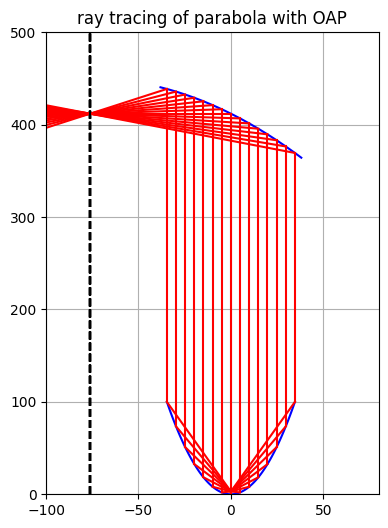

In [7]:
plot(15, 0, 0, -100, 80, 0, 500)


plt.grid(True)
plt.title('ray tracing of parabola with OAP')  
ax = plt.gca() # Get the current Axes object
ax.set_aspect(.5) # Set aspect ratio 
ax.set_xlim(-100, 80);

## zoom in to see where rays focus if the ion is exactly at the parabola's focus (0,3), and include dotted vertical line to show the intersection with the image plane $(y=-76.2 mm)$

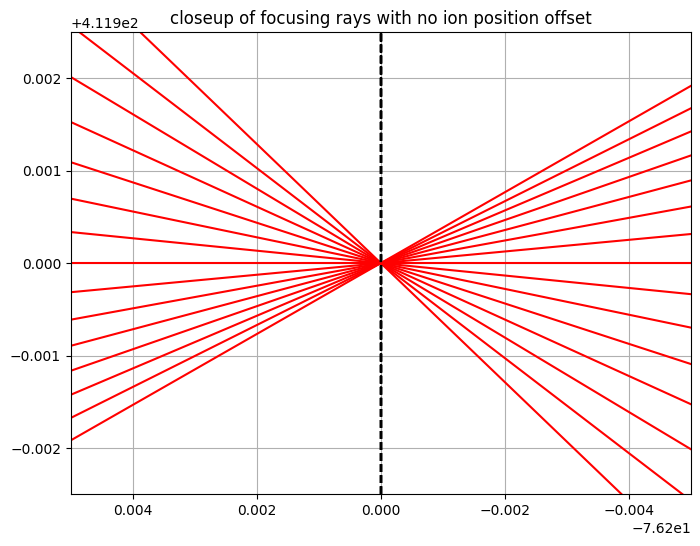

In [8]:
plot(15, 0, 0, -76.195, -76.205, 411.8975, 411.9025) 
plt.title('closeup of focusing rays with no ion position offset') ; 

## now, add an offset to the ion position. and zoom in to see focusing rays. add in plane to compare focal plane of OAP with best focus

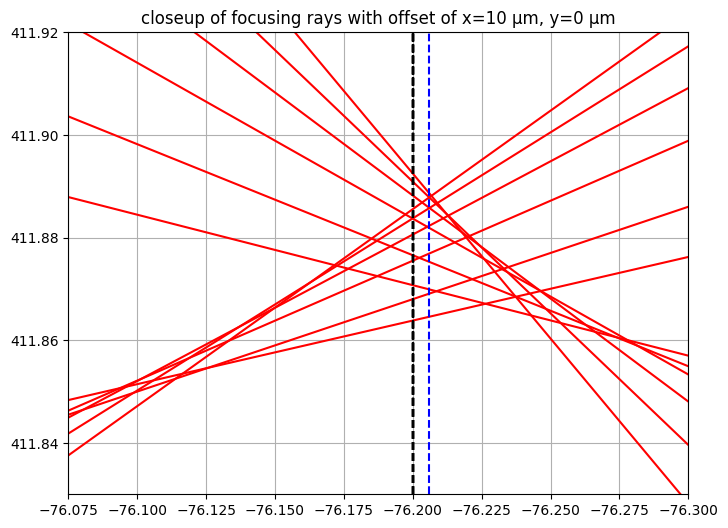

In [9]:
plot(15, 10*10**-3, 0, -76.075, -76.3, 411.83, 411.92)
plt.axvline(x=-76.206, color='b', linestyle='--')
plt.title('closeup of focusing rays with offset of x=10 µm, y=0 µm');

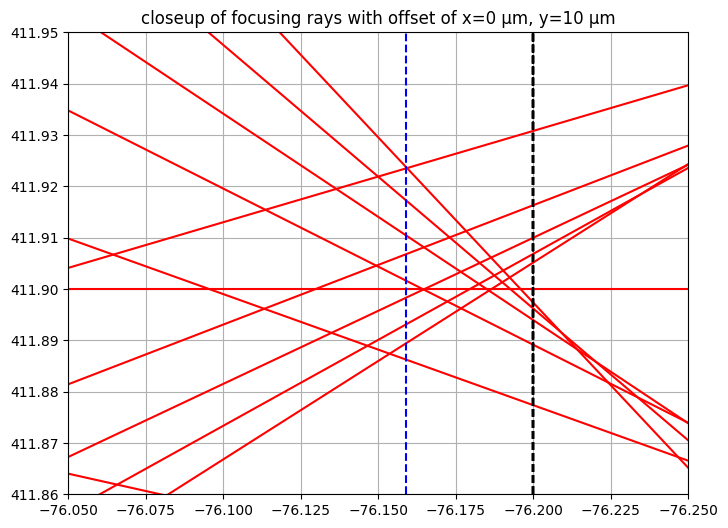

In [10]:
plot(15, 0, 10*10**-3, -76.05, -76.25, 411.86, 411.95)
plt.axvline(x=-76.159, color='b', linestyle='--')
plt.axvline(x=xfocus2, color='k', linestyle='--')
plt.title('closeup of focusing rays with offset of x=0 µm, y=10 µm');

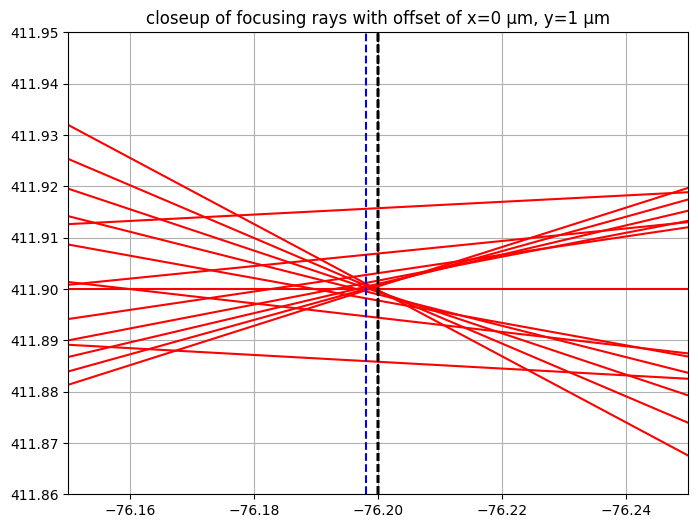

In [25]:
plot(15, 0, 10**-3, -76.15, -76.25, 411.86, 411.95)
plt.axvline(x=-76.198, color='b', linestyle='--')
plt.axvline(x=xfocus2, color='k', linestyle='--')
plt.title('closeup of focusing rays with offset of x=0 µm, y=1 µm');

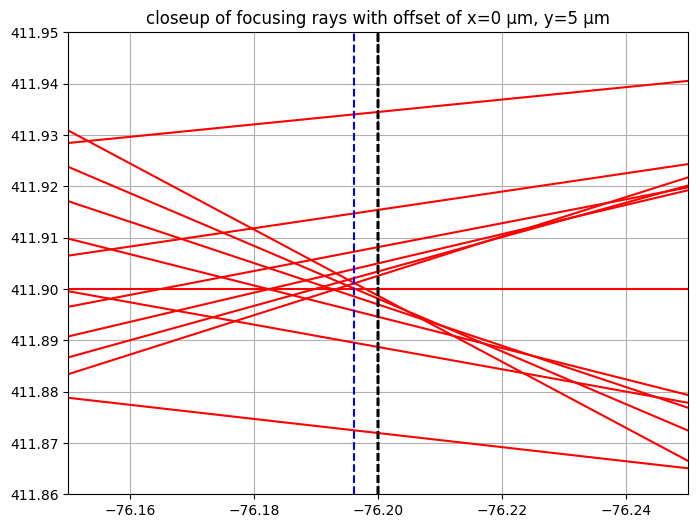

In [29]:
plot(15, 0, 5*10**-3, -76.15, -76.25, 411.86, 411.95)
plt.axvline(x=-76.196, color='b', linestyle='--')
plt.axvline(x=xfocus2, color='k', linestyle='--')
plt.title('closeup of focusing rays with offset of x=0 µm, y=5 µm');

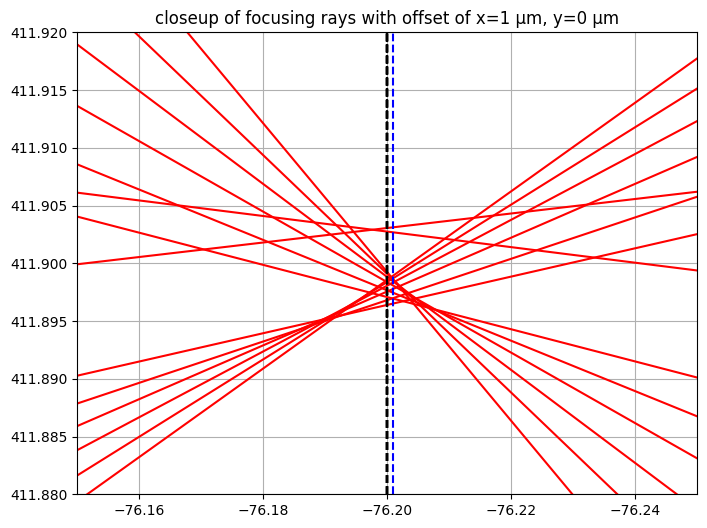

In [39]:
plot(15, 10**-3, 0, -76.15, -76.25, 411.88, 411.92)
plt.axvline(x=-76.201, color='b', linestyle='--')
plt.title('closeup of focusing rays with offset of x=1 µm, y=0 µm');

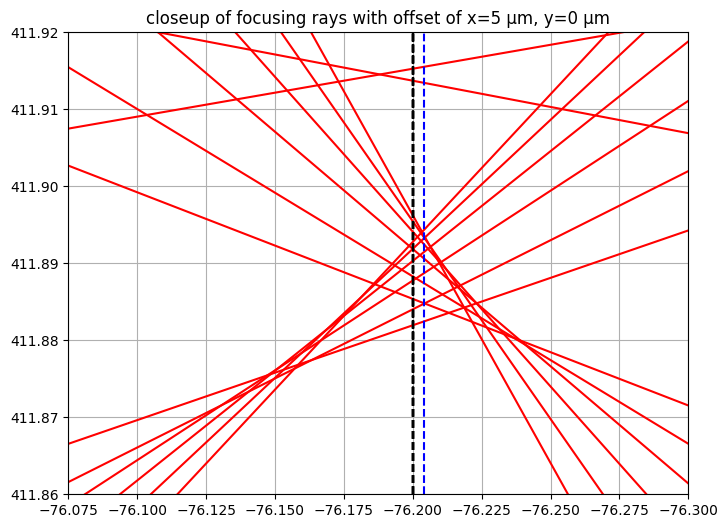

In [37]:
plot(15, 5*10**-3, 0, -76.075, -76.3, 411.86, 411.92)
plt.axvline(x=-76.204, color='b', linestyle='--')
plt.title('closeup of focusing rays with offset of x=5 µm, y=0 µm');